# Objective:
Identifying Environmental Risks Using Multiple APIs: Predicting Air Quality from Wildfire Trends on US NORTH East Coast The objective is to develop a predictive model that assesses air quality trends on the US North East Coast, with the focus on recent wildfires from Canada and vice versa if applicable. By integrating data from multiple APIs, this project aims to compare the consistency of data sources, predict air quality from recent wildfires, and identify potential environmental risks on predicting future wildfires and how neighboring counties are affected.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme()

In [2]:
# Load CSV files
boston_data = pd.read_csv('./Data/EPA/2.5/boston.csv')
dc_data = pd.read_csv('./Data/EPA/2.5/dc.csv')
ny_data = pd.read_csv('./Data/EPA/2.5/ny.csv')
philly_data = pd.read_csv('./Data/EPA/2.5/philly.csv')

In [3]:
# Concatenate datasets if they have consistent columns
pm25_data = pd.concat([boston_data, dc_data, ny_data, philly_data], ignore_index=True)
pm25_data['Date'] = pd.to_datetime(pm25_data['Date']) #  date to datetime 
pm25_data = pm25_data.sort_values(by='Date') # Sort by date

columns_to_drop = ['Source', 'POC', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code',
                   'AQS Parameter Description', 'Method Code', 'Method Description',
                   'CBSA Code', 'CBSA Name', 'Site Longitude', 'Site Latitude', 'County FIPS Code', 
                  'State FIPS Code', 'Site ID', 'Local Site Name']

pm25_data = pm25_data.drop(columns_to_drop, axis=1)

# Exploring Wildfire June 7th 2023 fromEPA DataSet.

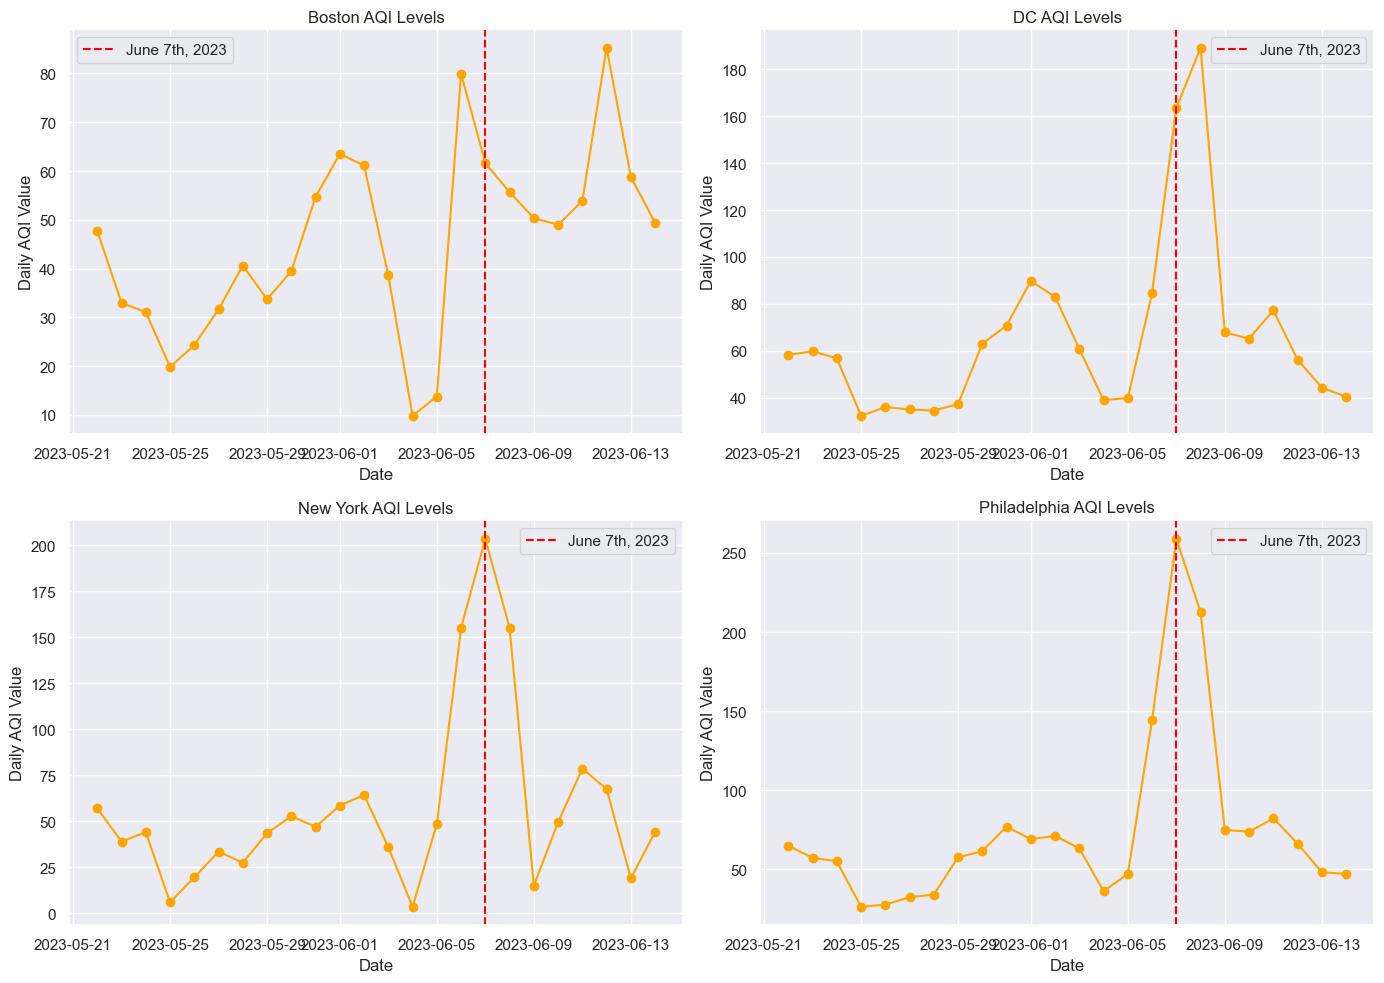

In [4]:
# Convert Date columns to datetime
boston_data['Date'] = pd.to_datetime(boston_data['Date'])
dc_data['Date'] = pd.to_datetime(dc_data['Date'])
ny_data['Date'] = pd.to_datetime(ny_data['Date'])
philly_data['Date'] = pd.to_datetime(philly_data['Date'])

# Define the date range
start_date = '2023-05-22'
end_date = '2023-06-14'

# Filter data for the specified date range
boston_june_data = boston_data[(boston_data['Date'] >= start_date) & (boston_data['Date'] <= end_date)]
dc_june_data = dc_data[(dc_data['Date'] >= start_date) & (dc_data['Date'] <= end_date)]
ny_june_data = ny_data[(ny_data['Date'] >= start_date) & (ny_data['Date'] <= end_date)]
philly_june_data = philly_data[(philly_data['Date'] >= start_date) & (philly_data['Date'] <= end_date)]

# Aggregate AQI data by date for each city
boston_june_agg = boston_june_data.groupby('Date')['Daily AQI Value'].mean().reset_index()
dc_june_agg = dc_june_data.groupby('Date')['Daily AQI Value'].mean().reset_index()
ny_june_agg = ny_june_data.groupby('Date')['Daily AQI Value'].mean().reset_index()
philly_june_agg = philly_june_data.groupby('Date')['Daily AQI Value'].mean().reset_index()

# 2x2 subplot for AQI levels
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Boston AQI
axs[0, 0].plot(boston_june_agg['Date'], boston_june_agg['Daily AQI Value'], marker='o', color='orange')
axs[0, 0].axvline(pd.to_datetime('2023-06-07'), color='red', linestyle='--', label='June 7th, 2023')
axs[0, 0].set_title('Boston AQI Levels')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Daily AQI Value')
axs[0, 0].legend()

# DC AQI
axs[0, 1].plot(dc_june_agg['Date'], dc_june_agg['Daily AQI Value'], marker='o', color='orange')
axs[0, 1].axvline(pd.to_datetime('2023-06-07'), color='red', linestyle='--', label='June 7th, 2023')
axs[0, 1].set_title('DC AQI Levels')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Daily AQI Value')
axs[0, 1].legend()

# New York AQI
axs[1, 0].plot(ny_june_agg['Date'], ny_june_agg['Daily AQI Value'], marker='o', color='orange')
axs[1, 0].axvline(pd.to_datetime('2023-06-07'), color='red', linestyle='--', label='June 7th, 2023')
axs[1, 0].set_title('New York AQI Levels')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Daily AQI Value')
axs[1, 0].legend()

# Philadelphia AQI
axs[1, 1].plot(philly_june_agg['Date'], philly_june_agg['Daily AQI Value'], marker='o', color='orange')
axs[1, 1].axvline(pd.to_datetime('2023-06-07'), color='red', linestyle='--', label='June 7th, 2023')
axs[1, 1].set_title('Philadelphia AQI Levels')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Daily AQI Value')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [5]:
# Boston: AQI levels spiked on June 7th, reaching about 150, unhealthy air quality as compared to chart. Before and after this date, levels remained significantly lower. indicating it managed to depart elsehwere
# Washington, DC: Similar to Boston, notable spike occurred on June 7th, reaching around 140. Before and after this peak, AQI levels were much lower, suggesting a sudden, short-term pollution event.
# New York: New York experienced the highest spike, with AQI levels peaking at approximately 160 on June 7th, also reflecting very unhealthy air quality.
# Philadelphia: The AQI in Philadelphia peaked at around 155 on June 7th, aligning with the patterns observed in the other cities, indicating widespread air quality issues on that date.

# Upload CO, NO2, & OZone

In [6]:
# CO CSV files
co_boston_data = pd.read_csv('./Data/EPA/CO/bostoncity.csv')
co_dc_data = pd.read_csv('./Data/EPA/CO/DCcounty.csv')
co_ny_data = pd.read_csv('./Data/EPA/CO/newyorkcity.csv')
co_philly_data = pd.read_csv('./Data/EPA/CO/phillycity.csv')

combined_co_data = pd.concat([co_boston_data, co_dc_data, co_ny_data, co_philly_data], ignore_index=True)

# NO2 CSV files
no2_boston_data = pd.read_csv('./Data/EPA/NO2/bostoncity.csv')
no2_dc_data = pd.read_csv('./Data/EPA/NO2/washingtondccity.csv')
no2_ny_data = pd.read_csv('./Data/EPA/NO2/newyorkcity.csv')
no2_philly_data = pd.read_csv('./Data/EPA/NO2/phillycity.csv')

# Concatenate
combined_no2_data = pd.concat([no2_boston_data, no2_dc_data, no2_ny_data, no2_philly_data], ignore_index=True)

# Ozone CSV files
ozone_boston_data = pd.read_csv('./Data/EPA/Ozone/bostoncity.csv')
ozone_dc_data = pd.read_csv('./Data/EPA/Ozone/washingtondccity.csv')
ozone_ny_data = pd.read_csv('./Data/EPA/Ozone/newyorkcity.csv')
ozone_philly_data = pd.read_csv('./Data/EPA/Ozone/phillycity.csv')

# Concatenate
combined_ozone_data = pd.concat([ozone_boston_data, ozone_dc_data, ozone_ny_data, ozone_philly_data], ignore_index=True)

In [7]:
print(combined_co_data.columns)
print(combined_no2_data.columns)
print(combined_ozone_data.columns)

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 1-hour NO2 Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')
Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
     

In [8]:
# Counties of interest
counties_of_interest = ['Suffolk', 'District of Columbia', 'New York', 'Philadelphia']

def clean_and_save_data(data, pollutant):
    columns_to_drop = [
        'Source', 'Site ID', 'POC', 'Local Site Name', 'Daily Obs Count', 
        'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 
        'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 
        'County FIPS Code', 'Site Longitude', 'Site Latitude'
    ]
    
    cleaned_data = data.drop(columns=columns_to_drop, errors='ignore')
    
    # Filter for specific counties
    filtered_data = cleaned_data[cleaned_data['County'].isin(counties_of_interest)]
    
    output_path = f'./Data/EPA/{pollutant}/combined_{pollutant.lower()}_data.csv'
    filtered_data.to_csv(output_path, index=False)
    return pd.read_csv(output_path)

co_data = clean_and_save_data(combined_co_data, 'CO')
no2_data = clean_and_save_data(combined_no2_data, 'NO2')
ozone_data = clean_and_save_data(combined_ozone_data, 'Ozone')

In [9]:
def process_data(df, pollutant, counties):
    concentration_columns = {
        'CO': 'Daily Max 8-hour CO Concentration',
        'NO2': 'Daily Max 1-hour NO2 Concentration',
        'Ozone': 'Daily Max 8-hour Ozone Concentration',
        'PM2.5': 'Daily Mean PM2.5 Concentration'
    }
    
    if pollutant not in concentration_columns:
        raise ValueError(f"Unknown pollutant: {pollutant}")
    
    conc_col = concentration_columns[pollutant]
    
    df['Date'] = pd.to_datetime(df['Date'])
    start_date = pd.to_datetime('2023-05-24')
    end_date = pd.to_datetime('2023-06-21')
    
    filtered_df = df[(df['Date'] >= start_date) & 
                     (df['Date'] <= end_date) & 
                     (df['County'].isin(counties))]
    
    filtered_df = filtered_df.rename(columns={conc_col: 'Concentration'})
    filtered_df['Pollutant'] = pollutant
    filtered_df['Measurement'] = conc_col
    
    return filtered_df.sort_values('Date')

# Process each
co_processed = process_data(co_data, 'CO', counties_of_interest)
no2_processed = process_data(no2_data, 'NO2', counties_of_interest)
ozone_processed = process_data(ozone_data, 'Ozone', counties_of_interest)
pm25_processed = process_data(pm25_data, 'PM2.5', counties_of_interest)

# Combine all 
combined_data = pd.concat([co_processed, no2_processed, ozone_processed, pm25_processed], ignore_index=True)
combined_data = combined_data[combined_data['County'].isin(counties_of_interest)] 

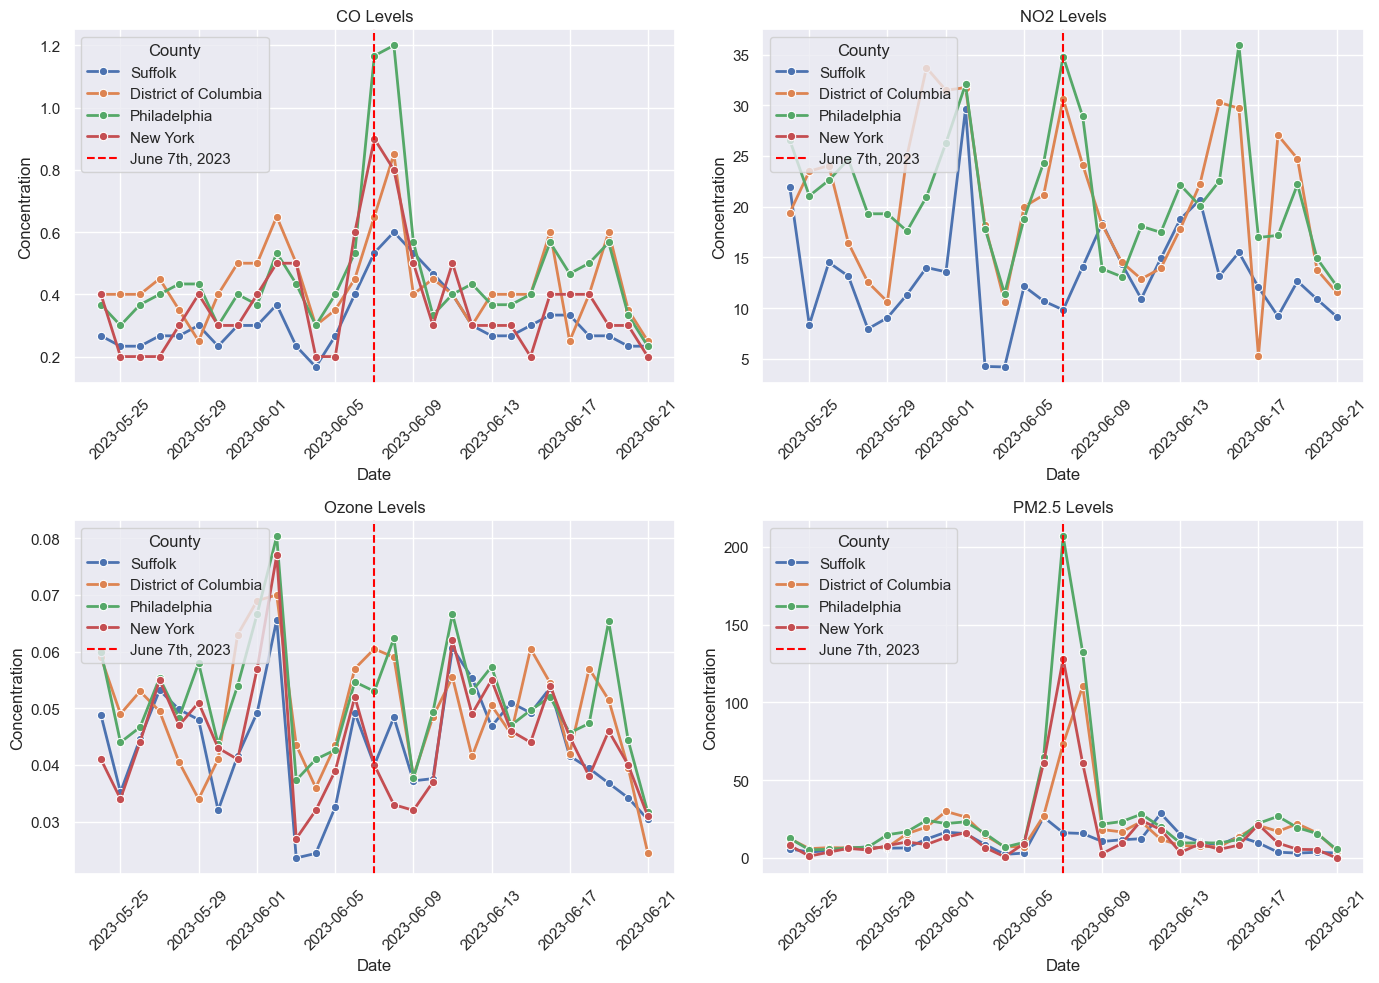

In [10]:
vertical_line_date = pd.Timestamp('2023-06-07')

# unique pollutants and cities
pollutants = combined_data['Pollutant'].unique()
cities = combined_data['County'].unique()

#2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each pollutant and create line sub plots 
for i, pollutant in enumerate(pollutants):
    pollutant_data = combined_data[combined_data['Pollutant'] == pollutant]
    for city in cities:
        city_data = pollutant_data[pollutant_data['County'] == city]
        sns.lineplot(data=city_data, x='Date', y='Concentration', marker='o', linewidth=2, ax=axs[i], label=city, errorbar=None)
    
    axs[i].set_title(f'{pollutant} Levels')
    axs[i].axvline(x=vertical_line_date, color='red', linestyle='--', label='June 7th, 2023')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Concentration')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='County', loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
# Define the date ranges for the two-week periods before and after June 7th, 2023
before_start_date = pd.Timestamp('2023-05-24')
before_end_date = pd.Timestamp('2023-06-07')
after_start_date = pd.Timestamp('2023-06-08')
after_end_date = pd.Timestamp('2023-06-21')

# Function to calculate changes for each pollutant
def calculate_changes(df, pollutant):
    # Filter data for the two periods
    before_data = df[(df['Date'] >= before_start_date) & (df['Date'] <= before_end_date)]
    after_data = df[(df['Date'] >= after_start_date) & (df['Date'] <= after_end_date)]

    # Calculate mean pollutant levels before and after June 7th
    mean_before = before_data.groupby('County')['Concentration'].mean().reset_index()
    mean_after = after_data.groupby('County')['Concentration'].mean().reset_index()

    # Merge the two datasets to calculate the changes
    change_data = pd.merge(mean_before, mean_after, on='County', suffixes=('_before', '_after'))

    # Calculate the absolute and percentage change
    change_data['Absolute Change'] = change_data['Concentration_after'] - change_data['Concentration_before']
    change_data['Percentage Change (%)'] = (change_data['Absolute Change'] / change_data['Concentration_before']) * 100
    
    change_data['Pollutant'] = pollutant
    
    return change_data

# Calculate changes for each pollutant
co_changes = calculate_changes(co_processed, 'CO')
no2_changes = calculate_changes(no2_processed, 'NO2')
ozone_changes = calculate_changes(ozone_processed, 'Ozone')
pm25_changes = calculate_changes(pm25_processed, 'PM2.5')

all_changes = pd.concat([co_changes, no2_changes, ozone_changes, pm25_changes], ignore_index=True)
all_changes

,County,Concentration_before,Concentration_after,Absolute Change,Percentage Change (%),Pollutant
0,District of Columbia,0.436667,0.432143,-0.004524,-1.035987,CO
1,New York,0.373333,0.371429,-0.001905,-0.510204,CO
2,Philadelphia,0.448889,0.480952,0.032063,7.142857,CO
3,Suffolk,0.291111,0.342857,0.051746,17.775354,CO
4,District of Columbia,21.708333,19.205769,-2.502564,-11.528126,NO2
5,Philadelphia,22.300000,19.282927,-3.017073,-13.529476,NO2
6,Suffolk,12.305172,13.868519,1.563346,12.704788,NO2
7,District of Columbia,0.050828,0.047714,-0.003113,-6.125218,Ozone
8,New York,0.045333,0.043714,-0.001619,-3.571429,Ozone
9,Philadelphia,0.052378,0.050610,-0.001768,-3.375519,Ozone


### CO (Carbon Monoxide)
Increase in concentration across all listed counties, with percentage changes ranging from about 2.54% to 25.22%. This suggests a notable rise in CO levels in the period following June 7th compared to the preceding two weeks.

### NO2 (Nitrogen Dioxide)
In District of Columbia and Philadelphia, NO2 levels decreased significantly (around 8.09% to 11.10% decrease), suggesting improved air quality regarding NO2 pollution. Conversely, Suffolk County experienced an increase of approximately 11.05% in NO2 concentration.

### Ozone
Slight decrease in Ozone levels in most counties, with changes ranging from a decrease of about 3.29% to 4.78%, except in Suffolk where there was a slight increase (4.30%). This indicates a relatively stable but slightly declining trend in Ozone levels.

### PM2.5 (Particulate Matter <2.5 μm)
Significant increases observed in all counties, with percentage changes ranging dramatically from 70.76% to 121.41%. This shows a substantial escalation in PM2.5 pollution post-June 7th.

C:\Users\741mp\AppData\Local\Temp\ipykernel_14852\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


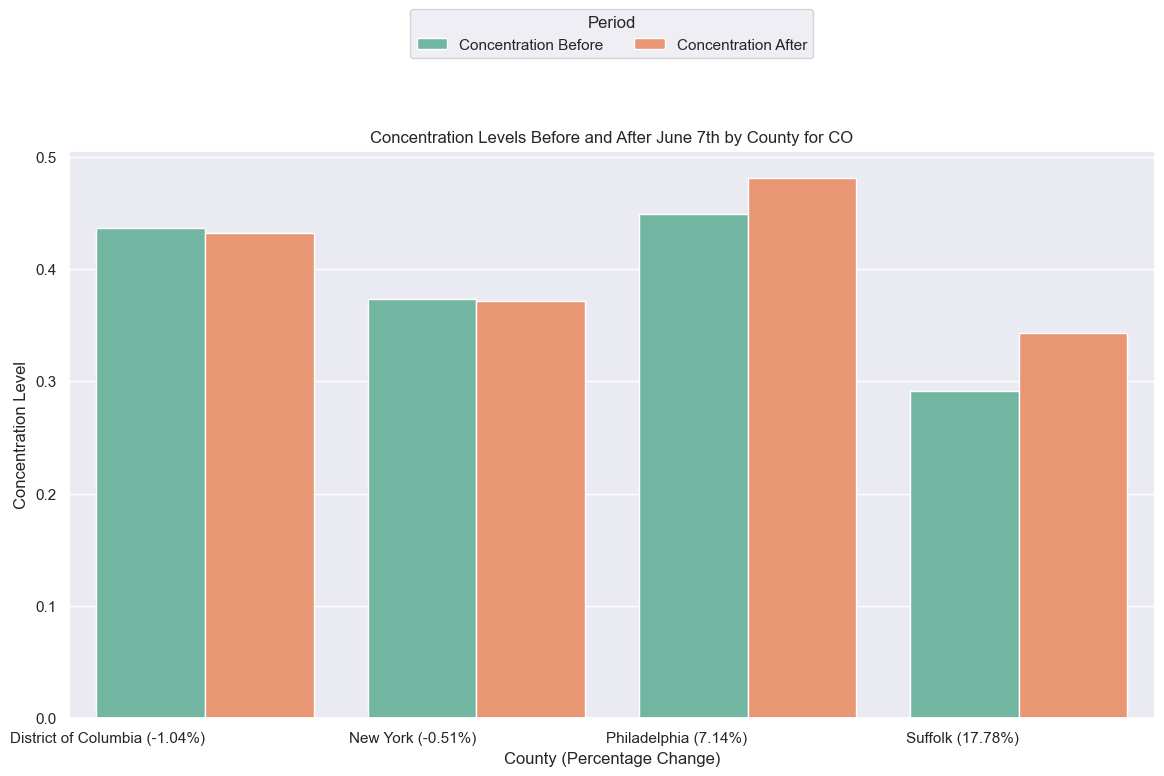

C:\Users\741mp\AppData\Local\Temp\ipykernel_14852\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


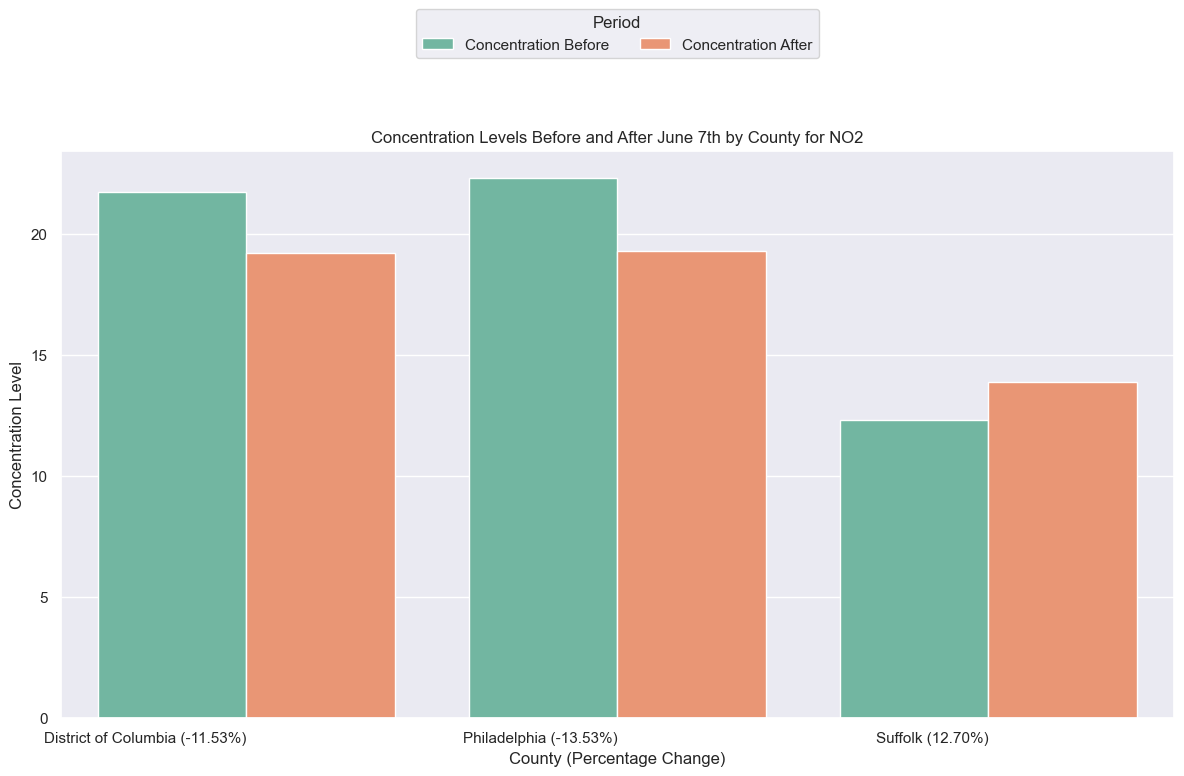

C:\Users\741mp\AppData\Local\Temp\ipykernel_14852\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


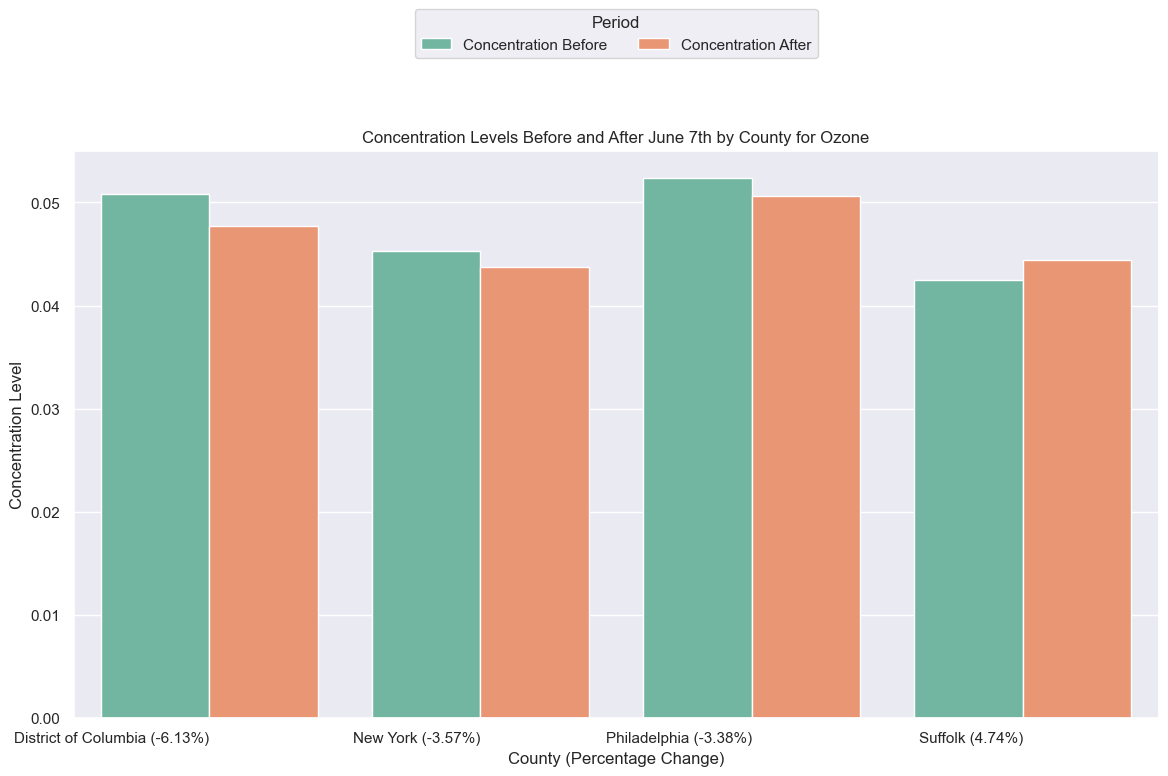

C:\Users\741mp\AppData\Local\Temp\ipykernel_14852\3554653836.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')


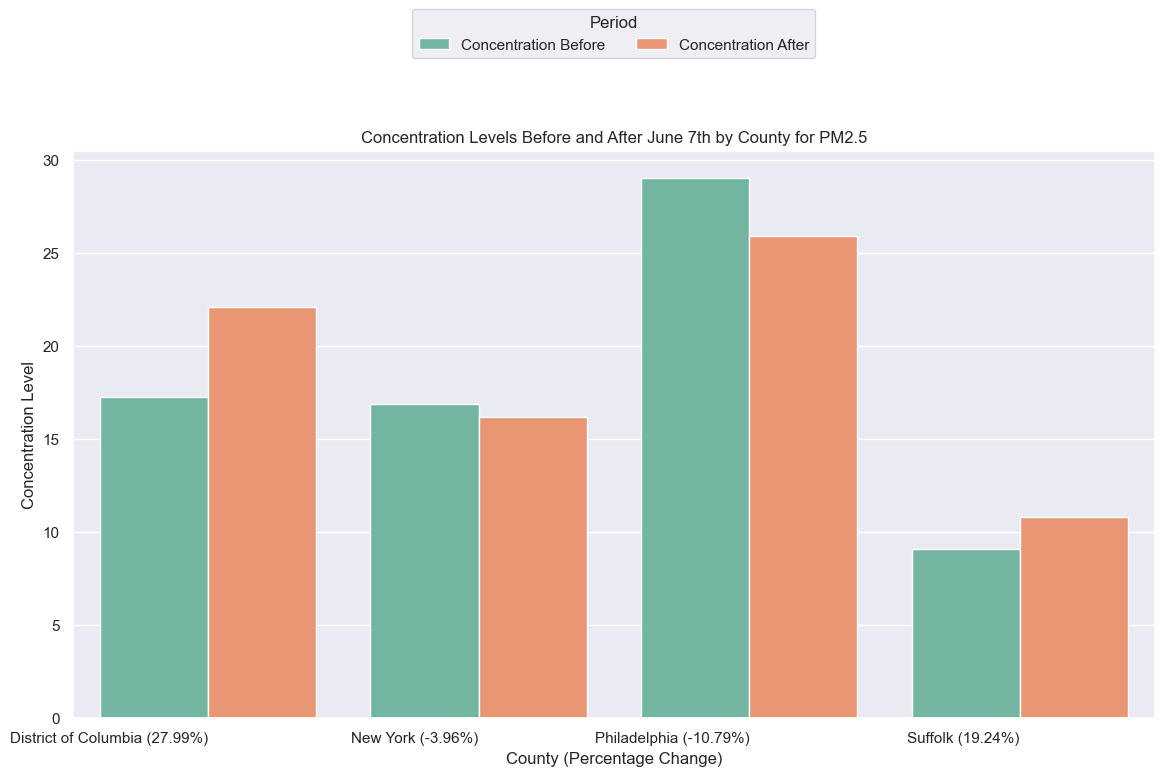

In [12]:
# Loop through each pollutant and create a single plot
for pollutant in all_changes['Pollutant'].unique():
    pollutant_data = all_changes[all_changes['Pollutant'] == pollutant]

    # Rename columns for better legend display
    pollutant_data = pollutant_data.rename(columns={
        'Concentration_before': 'Concentration Before',
        'Concentration_after': 'Concentration After'
    })

    melted_data = pollutant_data.melt(id_vars='County', 
                                      value_vars=['Concentration Before', 'Concentration After'], 
                                      var_name='Period', value_name='Concentration')

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=melted_data, x='County', y='Concentration', hue='Period', palette='Set2', errorbar=None)

    ax.set_xticklabels([f"{row['County']} ({row['Percentage Change (%)']:.2f}%)" for _, row in pollutant_data.iterrows()], ha='right')

    plt.title(f'Concentration Levels Before and After June 7th by County for {pollutant}')
    plt.ylabel('Concentration Level')
    plt.xlabel('County (Percentage Change)')
    ax.legend(title='Period', loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=2)

    plt.tight_layout()
    plt.show()

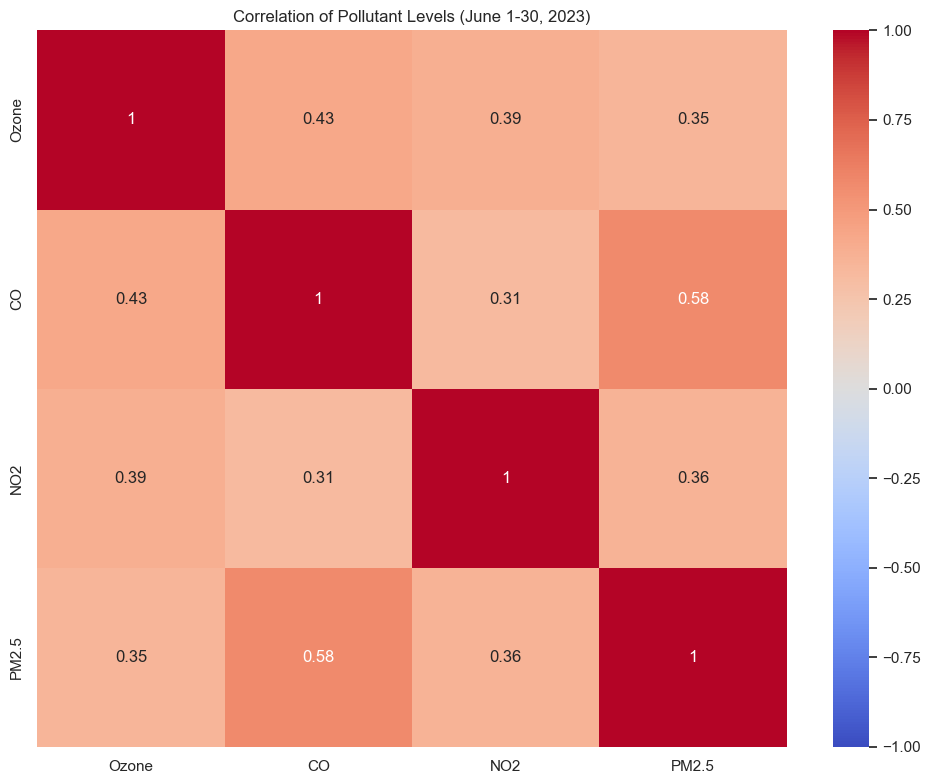

In [13]:
# Dictionary to map pollutant names to their concentration column names
concentration_columns = {
    'Ozone': 'Daily Max 8-hour Ozone Concentration',
    'CO': 'Daily Max 8-hour CO Concentration',
    'NO2': 'Daily Max 1-hour NO2 Concentration',
    'PM2.5': 'Daily Mean PM2.5 Concentration'
}

# Function to load and preprocess data
def load_and_preprocess(file_path, pollutant_name):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= '2023-06-01') & (df['Date'] <= '2023-06-30')]
    concentration_column = concentration_columns[pollutant_name]
    df = df[['Date', 'County', concentration_column]]
    df = df.rename(columns={concentration_column: pollutant_name})
    return df

# Load data
ozone_data = load_and_preprocess('./Data/EPA/Ozone/combined_ozone_data.csv', 'Ozone')
co_data = load_and_preprocess('./Data/EPA/CO/combined_co_data.csv', 'CO')
no2_data = load_and_preprocess('./Data/EPA/NO2/combined_no2_data.csv', 'NO2')
pm25_data = load_and_preprocess('./Data/EPA/2.5/combined_2.5_data.csv', 'PM2.5')

# Merge datasets
merged_data = ozone_data.merge(co_data, on=['Date', 'County'], how='outer')
merged_data = merged_data.merge(no2_data, on=['Date', 'County'], how='outer')
merged_data = merged_data.merge(pm25_data, on=['Date', 'County'], how='outer')

correlation_matrix = merged_data[['Ozone', 'CO', 'NO2', 'PM2.5']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Pollutant Levels (June 1-30, 2023)')
plt.tight_layout()
plt.show()

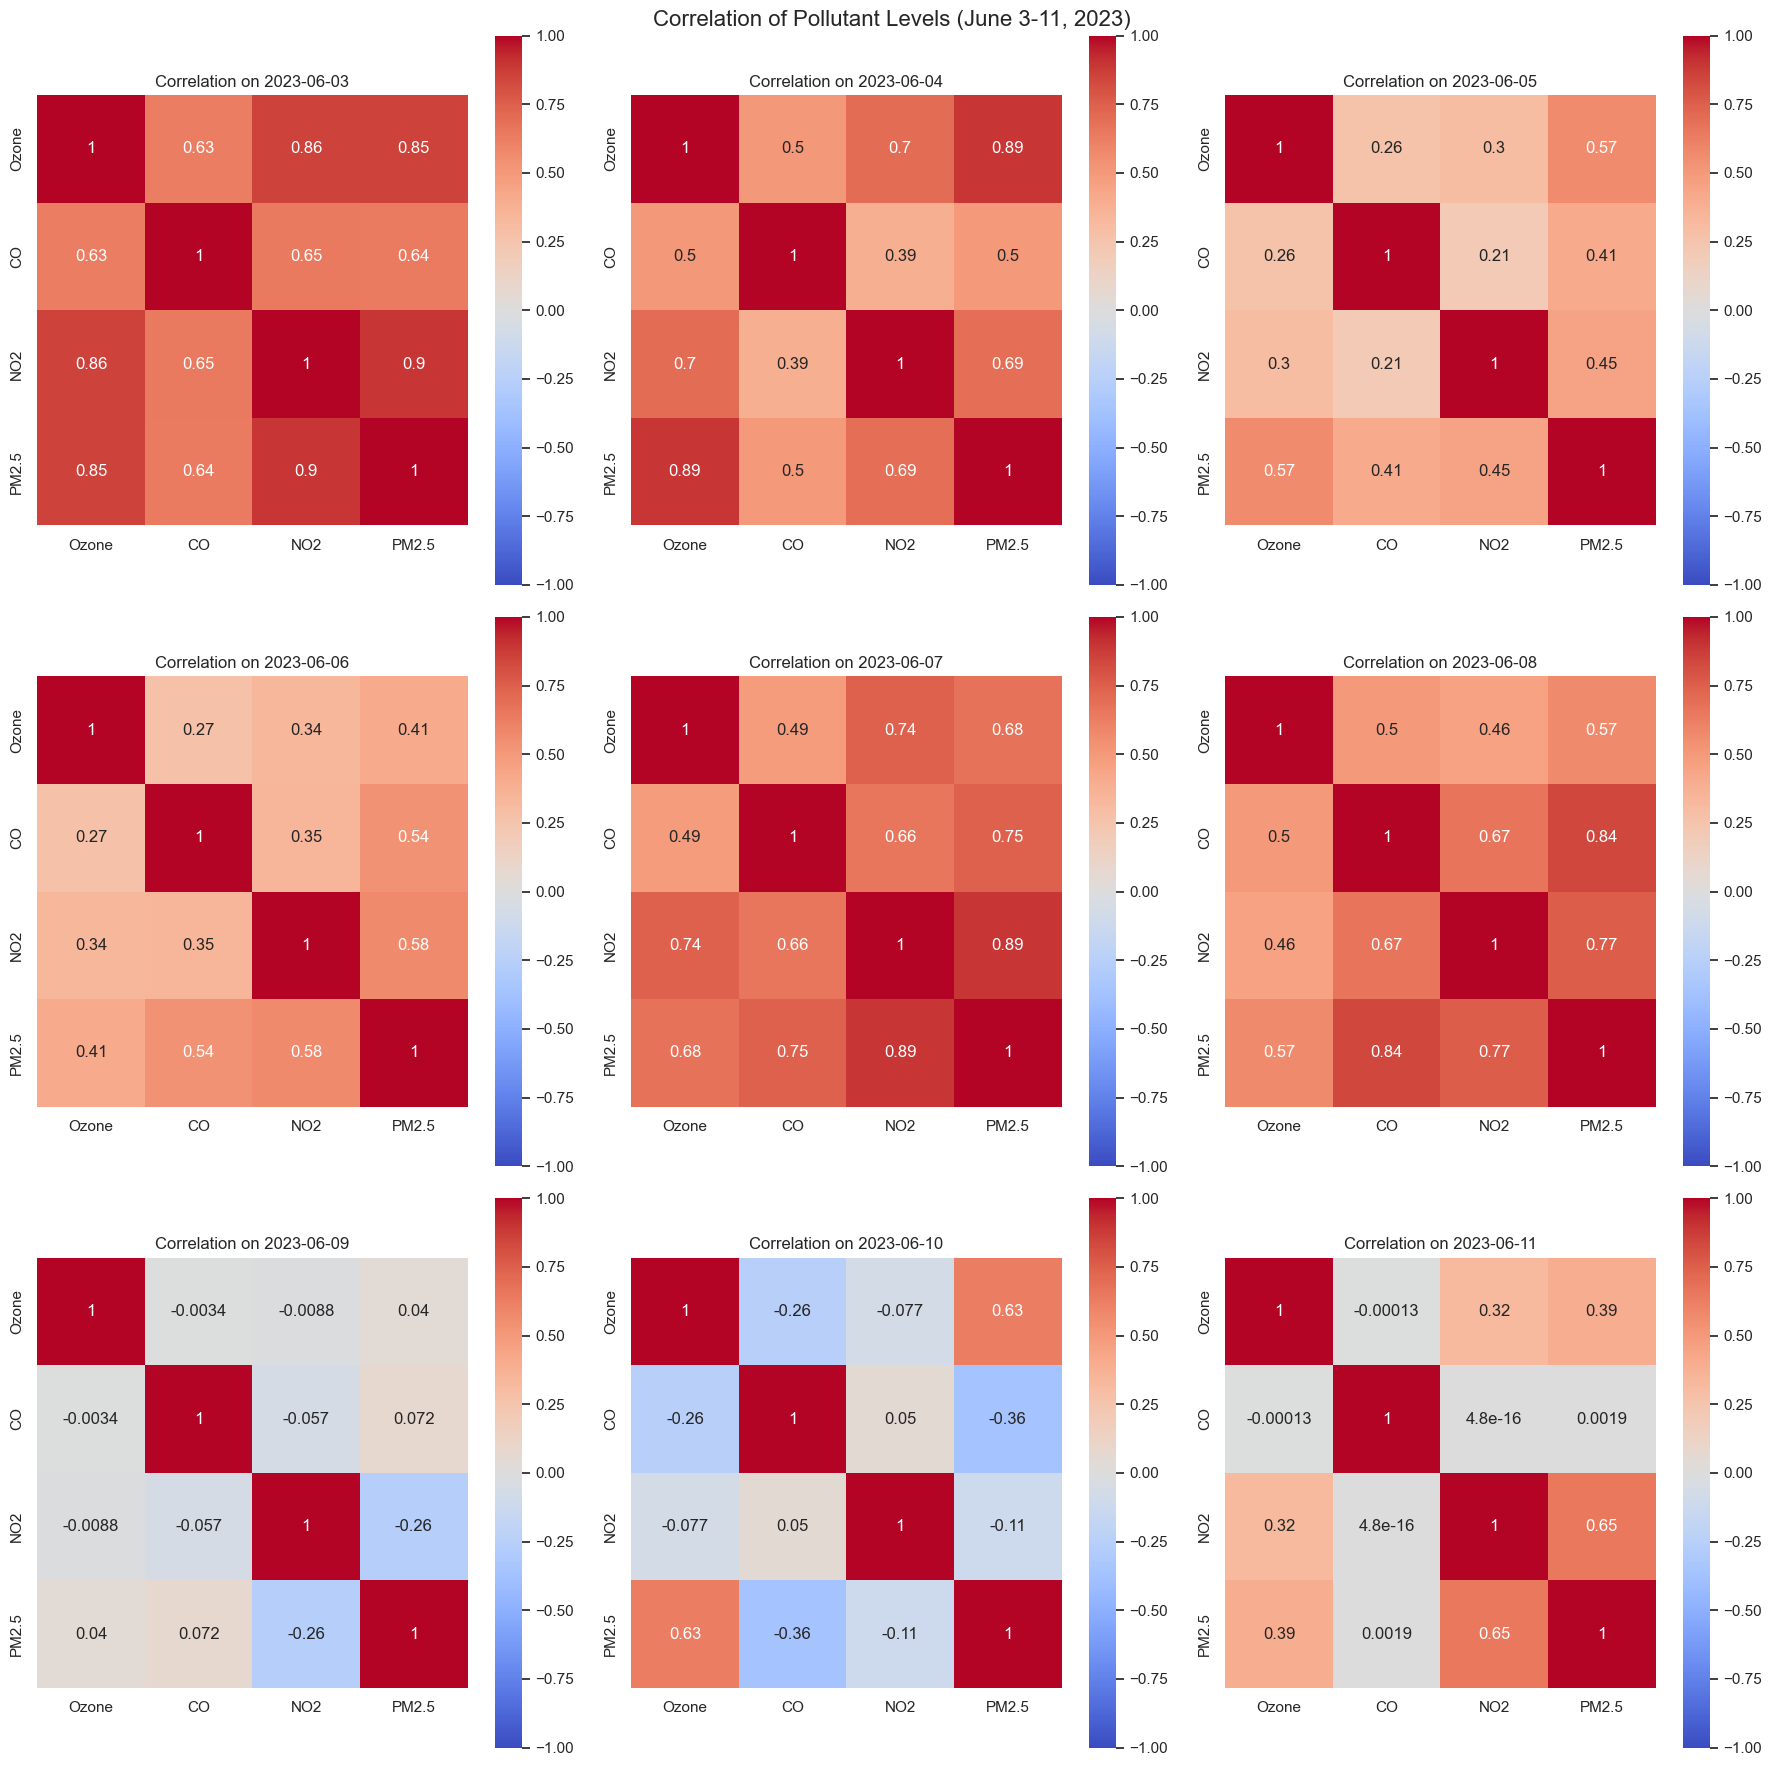

In [14]:
# Function to load and preprocess data
def load_and_preprocess(file_path, pollutant_name):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= '2023-06-03') & (df['Date'] <= '2023-06-11')]
    concentration_column = concentration_columns[pollutant_name]
    df = df[['Date', 'County', concentration_column]]
    df = df.rename(columns={concentration_column: pollutant_name})
    return df

# 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Correlation of Pollutant Levels (June 3-11, 2023)', fontsize=16)

for i, date in enumerate(pd.date_range(start='2023-06-03', end='2023-06-11')):
    date_data = merged_data[merged_data['Date'] == date]
    
    # correlations
    correlation_matrix = date_data[['Ozone', 'CO', 'NO2', 'PM2.5']].corr()
    
    # correlations
    row = i // 3
    col = i % 3
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[row, col], square=True)
    axes[row, col].set_title(f'Correlation on {date.date()}')

plt.tight_layout()
plt.show()